# 使用手寫辨識資料集, 觀察 PCA 算法

# [教學目標]
- 以 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化
- 因為非監督模型的效果, 較難以簡單的範例看出來  
  所以非監督偶數日提供的範例與作業, 主要目的在於觀察非監督模型的效果,  
  同學只要能感受到模型效果即可, 不用執著於搞懂程式的每一個部分

# [範例重點]
- 以手寫辨識資料集, 觀察 PCA 算法取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[5], Out[5])

In [1]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

#### Pipeline
- steps : list (List of (name, transform) tuples (implementing fit/transform) that are chained)

In [2]:
# 定義 PCA 與隨後的邏輯斯迴歸函數
logistic = SGDClassifier(loss='log', penalty='l2', max_iter=10000, tol=1e-5, random_state=0)
pca = PCA()
#steps=[(名稱, 方法)]
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

In [3]:
print("Shape: ", X_digits.shape)
print("Target: ", digits.target_names)

Shape:  (1797, 64)
Target:  [0 1 2 3 4 5 6 7 8 9]


In [4]:
# 先執行 GridSearchCV 跑出最佳參數
# pca降成幾維(降成多少特徵)
# LogisticRegrqession學習率1e-4 ~ 1e4 之間取五個(包括) 1e-4, 1e-2, 1e0, 1e+2, 1e+4

param_grid = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5),
}
search = GridSearchCV(pipe, param_grid, iid=False, cv=5, return_train_score=False, verbose=1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Best parameter (CV score=0.915):
{'logistic__alpha': 0.01, 'pca__n_components': 40}


[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:  1.1min finished


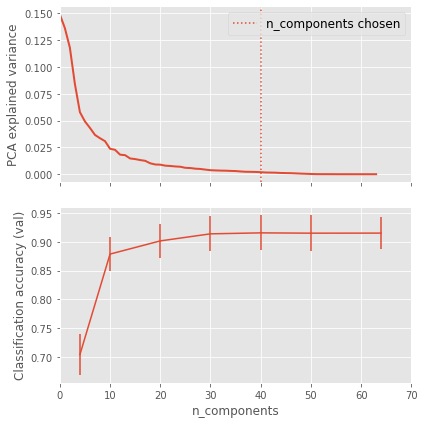

In [5]:
plt.style.use('ggplot')

# 繪製不同 components 的 PCA 解釋度
pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
ax0.axes.set_xlim([0,70])



# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)

#pca components數量
components_col = 'param_pca__n_components'

#pd.nlargest(回傳最大值數量, columns或names)
#假設components=4 一共有5種mean_test_score的不同分數, 找出n_components=4 且 mean_test_score分數最高的
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

#yerr error bar 在下圖每個刻度10,20,...畫上一直線
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
ax1.axes.set_xlim([0,70])
plt.tight_layout()
plt.show()

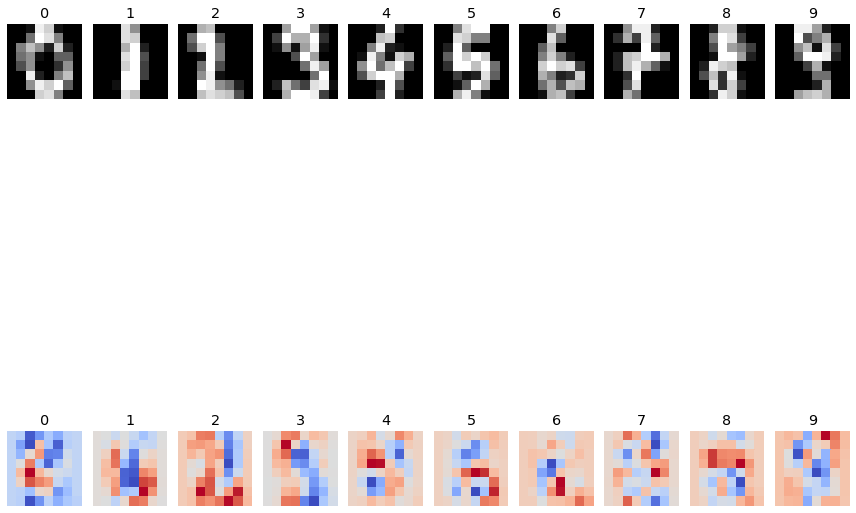

In [6]:
import seaborn as sns

idxs = []
for i in range(10):
    
    num_idx, = np.where(y_digits==i)
    idx = np.random.choice(num_idx, 1)
    idxs.append(idx.item())

k = 0
plt.figure(figsize=(12,9))

for i in idxs:
    plt.subplot(3, 10, k+1)
    plt.title(y_digits[i])
    plt.imshow(X_digits[i,:].reshape(8,8), cmap='gray')
    plt.axis('off')
    k+=1
    
    
for i in range(10):    
    plt.subplot(3, 10, k+11)
    plt.title(y_digits[i])
    sns.heatmap(search.best_estimator_['pca'].components_[i,:].reshape(8,8), square=True, cbar=False, cmap='coolwarm')
    plt.axis('off')
    k+=1
plt.tight_layout()

# 觀察結果
* explained variance ratio : 解釋變異性隨著 components 穩定下降
* 分類預測準確率 : 似乎也隨著 components 提升, 但是在 20 以後提升不多

# [作業目標]
- 試著模仿範例寫法, 以變更參數後的 PCA + 邏輯斯迴歸判斷手寫辨識資料集, 觀察不同 component 下正確率的變化

# [作業重點]
- 以手寫辨識資料集, 觀察變更參數後的 PCA 算法, 在取不同 component 時, PCA 解釋度與分類正確率如何變化 (In[10], Out[10])

In [7]:
# 載入套件
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [8]:
# 定義 PCA 與隨後的羅吉斯迴歸函數
# penalty 改為 L1, max_iter 改為 100
logistic = SGDClassifier(loss='log', penalty='l1', max_iter=100, tol=1e-5, random_state=0)
pca = PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

# 載入手寫數字辨識集
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target

# 作業
* 將參數 penalty 改為 L1, max_iter 改為 100, 觀察 PCA 與羅吉斯迴歸做手寫辨識的效果

In [9]:
param = {
    'pca__n_components': [4, 10, 20, 30, 40, 50, 64],
    'logistic__alpha': np.logspace(-4, 4, 5)
}
search = GridSearchCV(pipe, param_grid=param, cv=5, return_train_score=False, verbose=1)
search.fit(X_digits, y_digits)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:   54.9s finished


Best parameter (CV score=0.912):
{'logistic__alpha': 0.01, 'pca__n_components': 30}


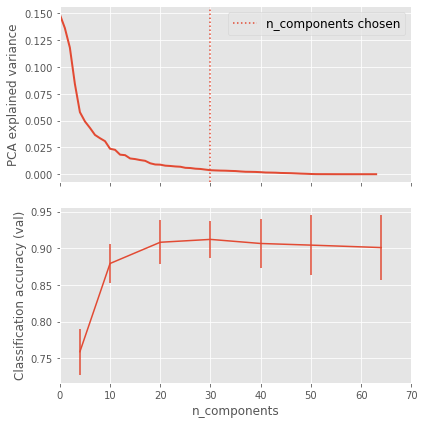

In [10]:
# 繪製不同 components 的 PCA 解釋度

plt.style.use('ggplot')

pca.fit(X_digits)

fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True, figsize=(6, 6))
ax0.plot(pca.explained_variance_ratio_, linewidth=2)
ax0.set_ylabel('PCA explained variance')

ax0.axvline(search.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
ax0.legend(prop=dict(size=12))
ax1.axes.set_xlim([0,70])


# 繪製不同採樣點的分類正確率
results = pd.DataFrame(search.cv_results_)

#pca components數量
components_col = 'param_pca__n_components'

#pd.nlargest(回傳最大值數量, columns或names)
#假設components=4 一共有5種mean_test_score的不同分數, 找出n_components=4 且 mean_test_score分數最高的
best_clfs = results.groupby(components_col).apply(lambda g: g.nlargest(1, 'mean_test_score'))

#yerr error bar 在下圖每個刻度10,20,...畫上一直線
best_clfs.plot(x=components_col, y='mean_test_score', yerr='std_test_score', legend=False, ax=ax1)
ax1.set_ylabel('Classification accuracy (val)')
ax1.set_xlabel('n_components')
ax1.axes.set_xlim([0,70])
plt.tight_layout()
plt.show()

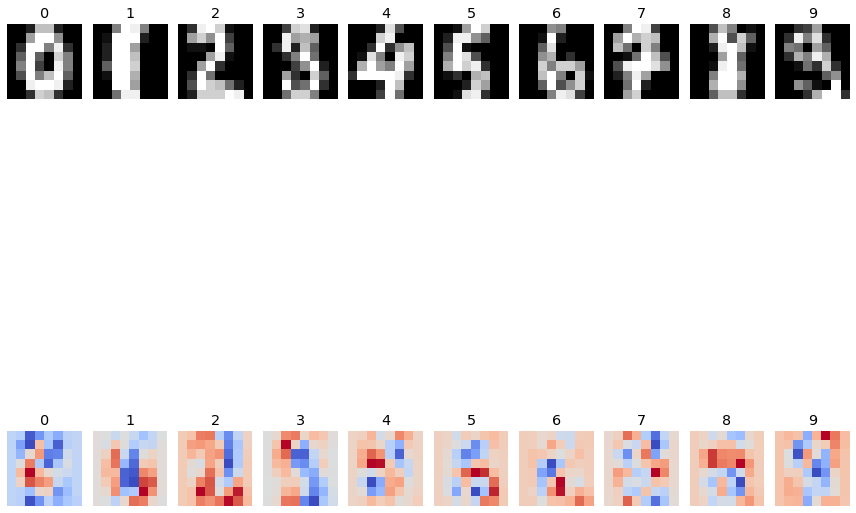

In [11]:
import seaborn as sns

idxs = []
for i in range(10):
    
    num_idx, = np.where(y_digits==i)
    idx = np.random.choice(num_idx, 1)
    idxs.append(idx.item())

k = 0
plt.figure(figsize=(12,9))

for i in idxs:
    plt.subplot(3, 10, k+1)
    plt.title(y_digits[i])
    plt.imshow(X_digits[i,:].reshape(8,8), cmap='gray')
    plt.axis('off')
    k+=1
    
    
for i in range(10):    
    plt.subplot(3, 10, k+11)
    plt.title(y_digits[i])
    sns.heatmap(search.best_estimator_['pca'].components_[i,:].reshape(8,8), square=True, cbar=False, cmap='coolwarm')
    plt.axis('off')
    k+=1
plt.tight_layout()

# 觀察結果
* explained variance ratio : 變異性依然隨著 components 穩定下降
* 分類預測準確率 : 在20以前是快速上升, 但是在30之後就開始走下坡, 可見L1並不如L2 Regularization穩定
